# Vehicle  Prediction 

### Import 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression



### Load the data

In [2]:
vehicle_df = pd.read_excel(r'C:\Users\preej\IOD\Workspace\new\Vehicle_Population_Train_Test_use.xlsx')

### <span style= "color:red">Data Visualizations and Cleaning</span>
### Look at the data

In [3]:
vehicle_df.head()

,Date,Vehicle Category,GVWR Class,Fuel Type,Model Year,Fuel Technology,Electric Mile Range,Number of Vehicles Registered at the Same Address,Region,Vehicle Population
0,2020,P,Not Applicable,Gasoline,2015,ICE,Not Applicable,≥4,Statewide,312920
1,2020,P,Not Applicable,Gasoline,2016,ICE,Not Applicable,≥4,Statewide,312842
2,2020,P,Not Applicable,Gasoline,2017,ICE,Not Applicable,≥4,Statewide,303437
3,2020,P,Not Applicable,Gasoline,2019,ICE,Not Applicable,≥4,Statewide,281921
4,2020,P,Not Applicable,Gasoline,2018,ICE,Not Applicable,≥4,Statewide,281326


In [4]:
rename_columns_dict = {"Vehicle Category": "Vehicle_Category", "GVWR Class": "GVWR_Class", "Fuel Type": "Fuel_Type", "Model Year":"Model_Year",  "Fuel Technology":"Fuel_Technology", "Electric Mile Range":"Electric_Mile_Range", "Number of Vehicles Registered at the Same Address":"No.of_Vehicles_Reg_at_Same_Address", "Vehicle Population":"Vehicle_Population"}
vehicle_df = vehicle_df.rename(columns=rename_columns_dict)

In [5]:
vehicle_df

,Date,Vehicle_Category,GVWR_Class,Fuel_Type,Model_Year,Fuel_Technology,Electric_Mile_Range,No.of_Vehicles_Reg_at_Same_Address,Region,Vehicle_Population
0,2020,P,Not Applicable,Gasoline,2015,ICE,Not Applicable,≥4,Statewide,312920
1,2020,P,Not Applicable,Gasoline,2016,ICE,Not Applicable,≥4,Statewide,312842
2,2020,P,Not Applicable,Gasoline,2017,ICE,Not Applicable,≥4,Statewide,303437
3,2020,P,Not Applicable,Gasoline,2019,ICE,Not Applicable,≥4,Statewide,281921
4,2020,P,Not Applicable,Gasoline,2018,ICE,Not Applicable,≥4,Statewide,281326
...,...,...,...,...,...,...,...,...,...,...
48594,2015,B,Not Applicable,Diesel,1978,ICE,Not Applicable,1,Statewide,1
48595,2015,B,Not Applicable,Diesel,1975,ICE,Not Applicable,2,Statewide,1
48596,2015,B,Not Applicable,Diesel,1973,ICE,Not Applicable,3,Statewide,1
48597,2015,B,Not Applicable,Diesel,1971,ICE,Not Applicable,2,Statewide,1


In [6]:
unique_values_in_column = vehicle_df['Date'].nunique()
unique_values_in_column

6

In [7]:
unique_values_in_column = vehicle_df['Fuel_Type'].nunique()
unique_values_in_column

6

### Look at Metadata

In [8]:
vehicle_df.shape

(48599, 10)

In [9]:
vehicle_df.dtypes

Date                                   int64
Vehicle_Category                      object
GVWR_Class                            object
Fuel_Type                             object
Model_Year                            object
Fuel_Technology                       object
Electric_Mile_Range                   object
No.of_Vehicles_Reg_at_Same_Address    object
Region                                object
Vehicle_Population                     int64
dtype: object

In [10]:
vehicle_df.describe()

,Date,Vehicle_Population
count,48599.000000,48599.000000
mean,2017.453404,3478.603428
std,1.686450,18745.402498
min,2015.000000,1.000000
25%,2016.000000,5.000000
50%,2017.000000,39.000000
75%,2019.000000,385.000000
max,2020.000000,391944.000000


In [11]:
df=pd.DataFrame(vehicle_df)

In [12]:
df['Electric_Mile_Range'].unique()

array(['Not Applicable', '>150 miles', '0 to 50 miles',
       '101 to 150 miles', '51 to 100 miles', 'Unknown'], dtype=object)

In [13]:
df['Fuel_Type'].unique()

array(['Gasoline', 'Electric', 'Diesel', 'Natural Gas', 'Hydrogen',
       'Unknown'], dtype=object)

In [14]:
df['Fuel_Technology'].unique()

array(['ICE', 'BEV', 'PHEV', 'FCEV'], dtype=object)

In [15]:
df['GVWR_Class'].unique()

array(['Not Applicable', 1, 2, 'Unknown', 8, 5, 3, 6, 7, 4], dtype=object)

In [16]:
df['Vehicle_Category'].unique()

array(['P', 'T2', 'T3', 'T1', 'MC', 'T4', 'T7', 'T6', 'T5', 'MH', 'BT',
       'BS', 'B'], dtype=object)

In [17]:
df['Date'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015], dtype=int64)

In [18]:
df['No.of_Vehicles_Reg_at_Same_Address'].unique()

array(['≥4', 2, 1, 3, 'Unknown'], dtype=object)

In [19]:
df['Region'].unique()

array(['Statewide'], dtype=object)

In [20]:
df['Vehicle_Population'].unique()

array([312920, 312842, 303437, ...,    650,    599,    594], dtype=int64)

In [21]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y')  
df['No.of_Vehicles_Reg_at_Same_Address'] = pd.to_numeric(df['No.of_Vehicles_Reg_at_Same_Address'], errors='coerce')
df.drop(df[df['Model_Year'] == 'Unknown'].index, inplace=True)
df['Model_Year'] = df['Model_Year'].astype(int)



In [22]:
df.dtypes

Date                                  datetime64[ns]
Vehicle_Category                              object
GVWR_Class                                    object
Fuel_Type                                     object
Model_Year                                     int32
Fuel_Technology                               object
Electric_Mile_Range                           object
No.of_Vehicles_Reg_at_Same_Address           float64
Region                                        object
Vehicle_Population                             int64
dtype: object

### Check for duplicates

In [23]:
vehicle_df.duplicated().sum()

0

### Look at summary data

In [24]:
vehicle_df.describe(include='all')

,Date,Vehicle_Category,GVWR_Class,Fuel_Type,Model_Year,Fuel_Technology,Electric_Mile_Range,No.of_Vehicles_Reg_at_Same_Address,Region,Vehicle_Population
count,48599.000000,48599,48599,48599,48599.0,48599,48599,34222.000000,48599,48599.000000
unique,NaN,13,10,6,53.0,4,6,NaN,1,NaN
top,NaN,T6,Not Applicable,Gasoline,2012.0,ICE,Not Applicable,NaN,Statewide,NaN
freq,NaN,10523,17020,21753,1415.0,43848,43848,NaN,48599,NaN
mean,2017.453404,NaN,NaN,NaN,NaN,NaN,NaN,1.963678,NaN,3478.603428
std,1.686450,NaN,NaN,NaN,NaN,NaN,NaN,0.821027,NaN,18745.402498
min,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000
25%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,5.000000
50%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,39.000000
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,385.000000


In [25]:
for c in vehicle_df:
    if vehicle_df[c].dtype != 'int64':
        print(vehicle_df[c].value_counts())

T6    10523
T3     4786
T4     4630
P      4575
T2     3972
T1     3307
B      2766
BS     2608
MC     2426
MH     2353
BT     2292
T7     2236
T5     2125
Name: Vehicle_Category, dtype: int64
Not Applicable    17020
Unknown            9870
2                  5097
1                  3767
6                  2349
7                  2279
8                  2236
3                  2125
5                  1930
4                  1926
Name: GVWR_Class, dtype: int64
Gasoline       21753
Diesel         18469
Natural Gas     4177
Electric        3967
Hydrogen         147
Unknown           86
Name: Fuel_Type, dtype: int64
2012       1415
2013       1349
2015       1318
2014       1300
2016       1251
2002       1225
2011       1201
2003       1192
2008       1152
2001       1151
2009       1149
1999       1148
2010       1122
2007       1121
2000       1118
2004       1096
2006       1087
2005       1062
1997       1043
1998       1041
1996       1014
2017       1013
1993        989
1995        

### Check for missing variables

In [26]:
vehicle_df.isna().sum()


Date                                      0
Vehicle_Category                          0
GVWR_Class                                0
Fuel_Type                                 0
Model_Year                                0
Fuel_Technology                           0
Electric_Mile_Range                       0
No.of_Vehicles_Reg_at_Same_Address    14377
Region                                    0
Vehicle_Population                        0
dtype: int64

In [27]:
#TODO: There aren't any "missing" values, but is there a placeholder value for missing values? Maybe we want to try dropping those rows?
#train_df = train_df[train_df.variable != 'placeholder missing value']
median_value = df['No.of_Vehicles_Reg_at_Same_Address'].median()
df['No.of_Vehicles_Reg_at_Same_Address'].fillna(median_value, inplace=True)


In [28]:
df.isna().sum()

Date                                  0
Vehicle_Category                      0
GVWR_Class                            0
Fuel_Type                             0
Model_Year                            0
Fuel_Technology                       0
Electric_Mile_Range                   0
No.of_Vehicles_Reg_at_Same_Address    0
Region                                0
Vehicle_Population                    0
dtype: int64

### Visualize variables

In [29]:
df.columns

Index(['Date', 'Vehicle_Category', 'GVWR_Class', 'Fuel_Type', 'Model_Year',
       'Fuel_Technology', 'Electric_Mile_Range',
       'No.of_Vehicles_Reg_at_Same_Address', 'Region', 'Vehicle_Population'],
      dtype='object')

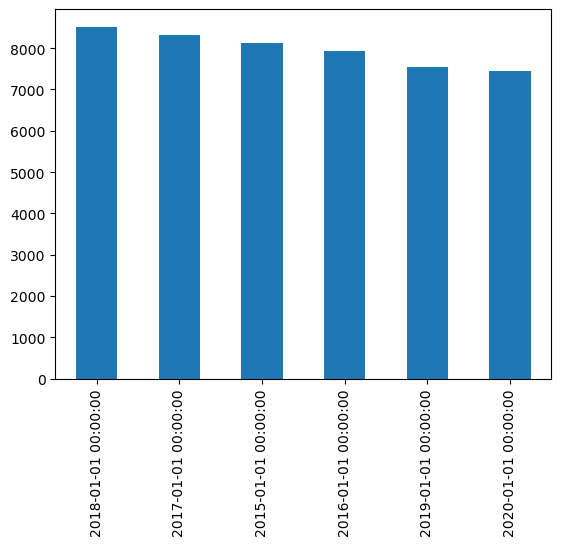

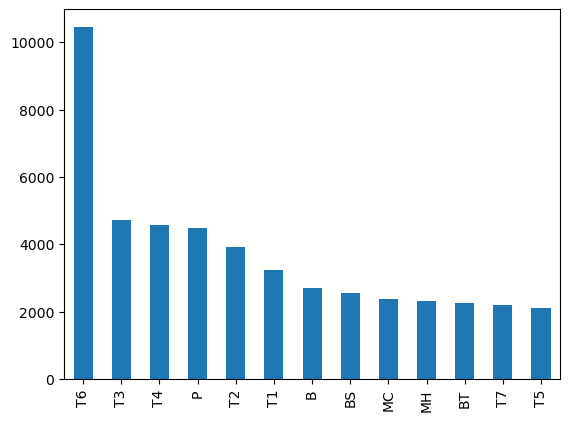

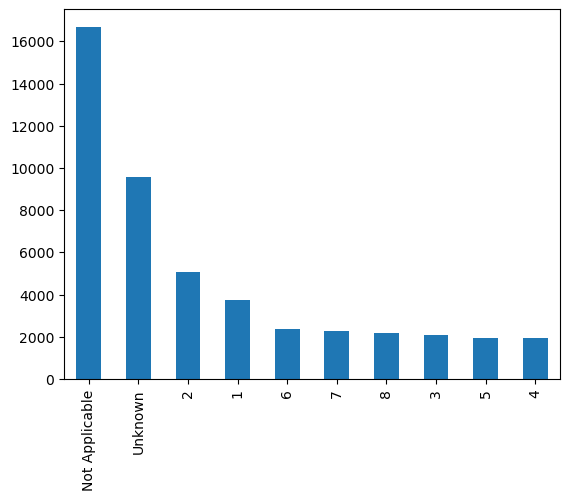

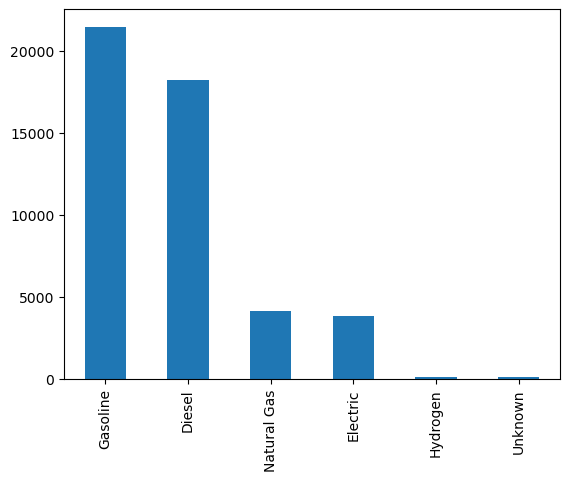

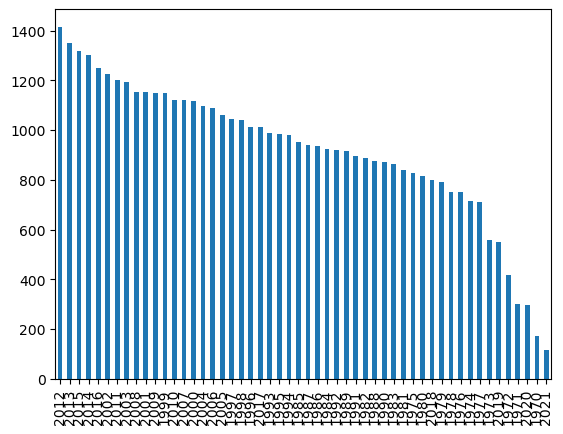

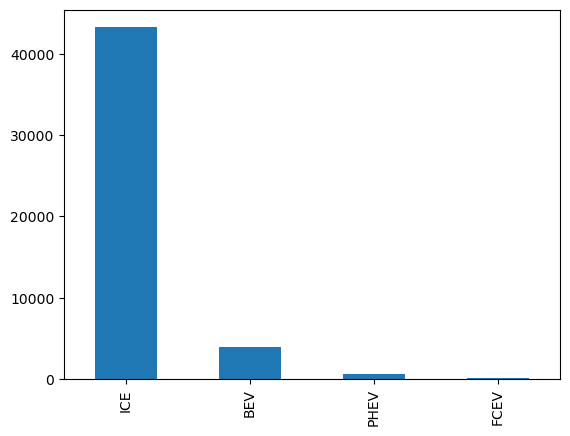

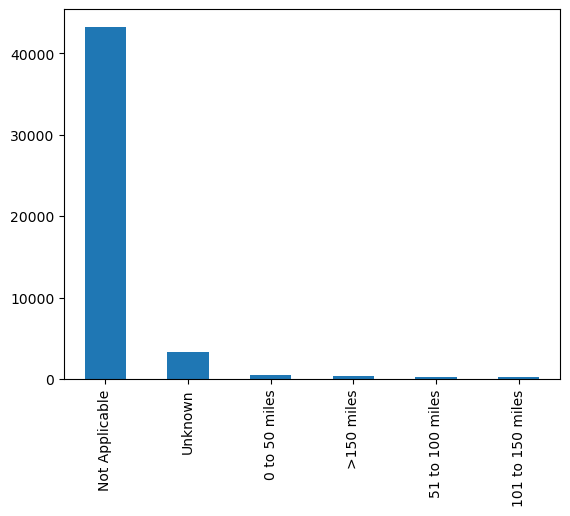

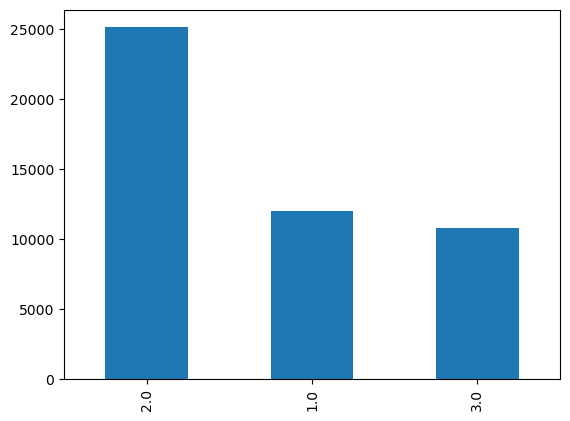

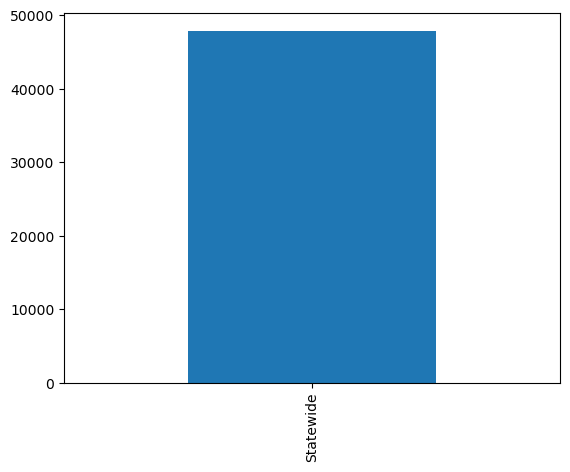

In [30]:
for c in df:
    if df[c].dtype != 'int64':
        df[c].value_counts().plot(kind='bar')
        plt.show()

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Model_Year'}>],
       [<Axes: title={'center': 'No.of_Vehicles_Reg_at_Same_Address'}>,
        <Axes: title={'center': 'Vehicle_Population'}>]], dtype=object)

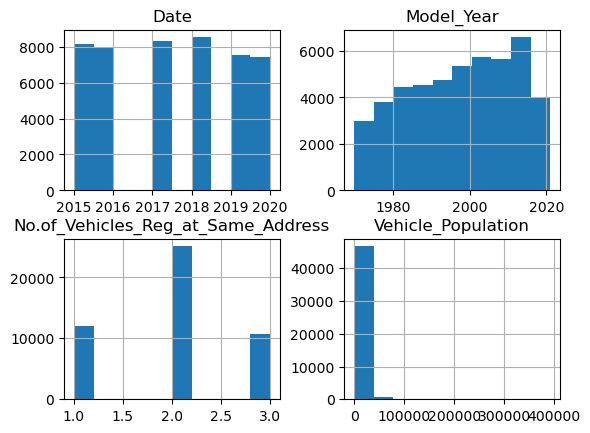

In [31]:
df.hist()

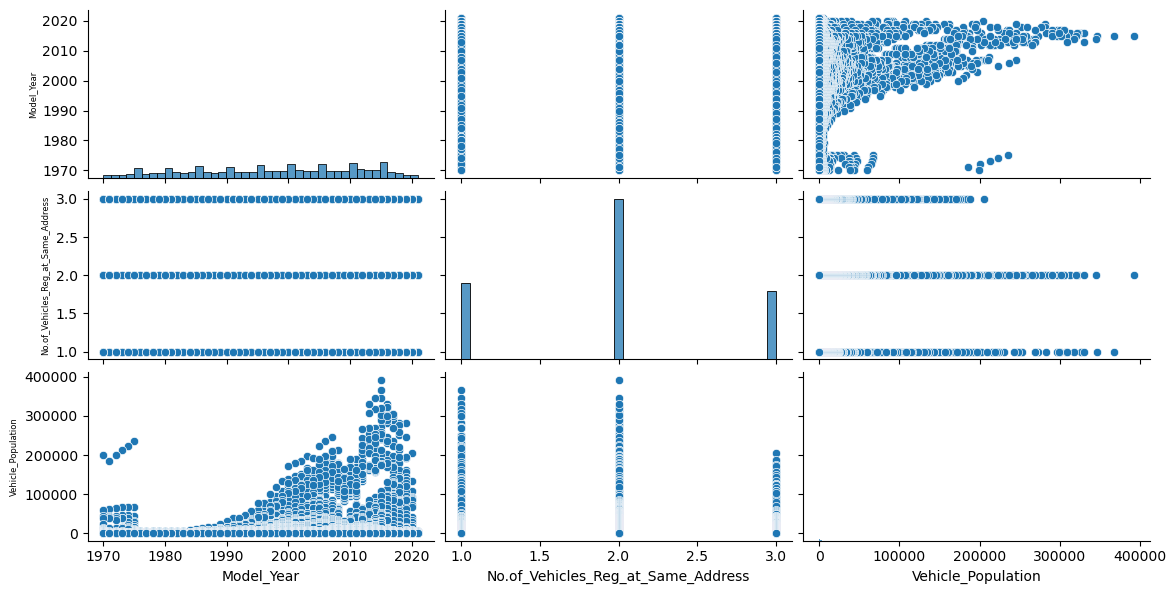

In [32]:
# Select the numerical columns from the DataFrame (exclude non-numeric columns)
numerical_columns = df.select_dtypes(include=['number'])

# Create a scatter matrix plot
g = sns.pairplot(numerical_columns, markers='o', diag_kind='hist', height=2, aspect=2)

# Set y-axis labels for each subplot
for ax in g.axes.flat:
    ax.set_ylabel(ax.get_ylabel(), size=6)

plt.show()



<Axes: >

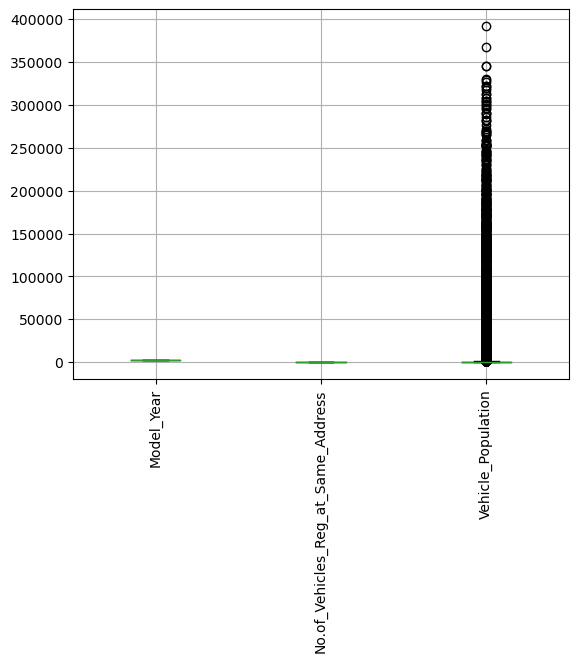

In [33]:
df.boxplot(rot=90)

<Axes: xlabel='Date', ylabel='Vehicle_Population'>

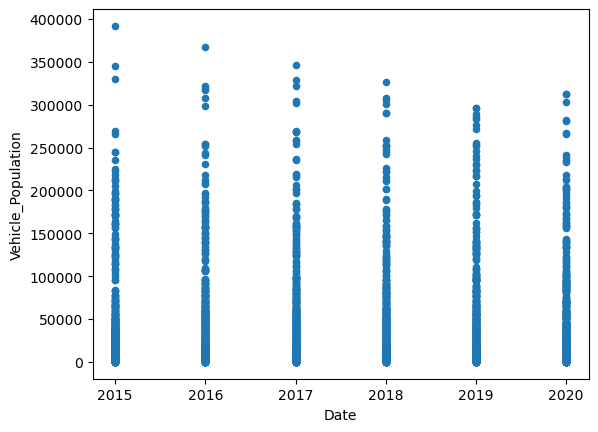

In [34]:
df.plot.scatter(x='Date' , y='Vehicle_Population')

<Axes: xlabel='Fuel_Type', ylabel='Vehicle_Population'>

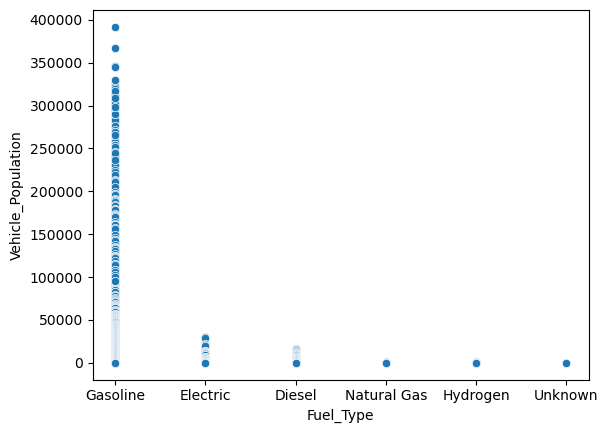

In [35]:
# TODO: Copy this code into a new cell and replace with several other combinations of features to investigate other relationships
sns.scatterplot(x='Fuel_Type', y='Vehicle_Population', data=df)

<Axes: xlabel='Vehicle_Category', ylabel='Vehicle_Population'>

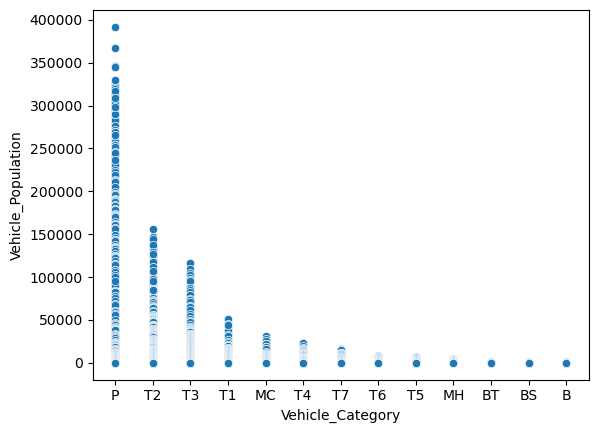

In [36]:
sns.scatterplot(x='Vehicle_Category', y='Vehicle_Population', data=df)

<Axes: xlabel='No.of_Vehicles_Reg_at_Same_Address', ylabel='Vehicle_Population'>

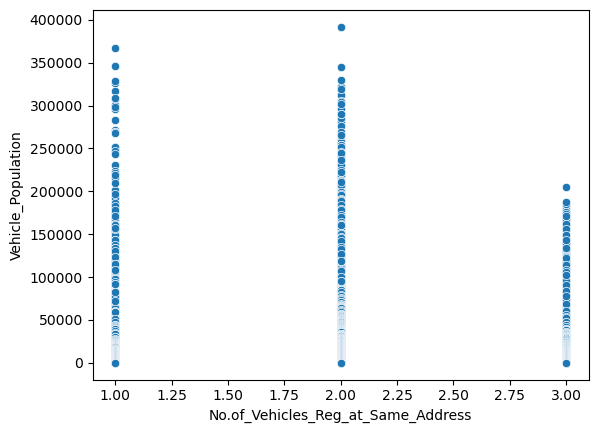

In [37]:
sns.scatterplot(x='No.of_Vehicles_Reg_at_Same_Address', y='Vehicle_Population', data=df)

<Axes: xlabel='Model_Year', ylabel='Vehicle_Population'>

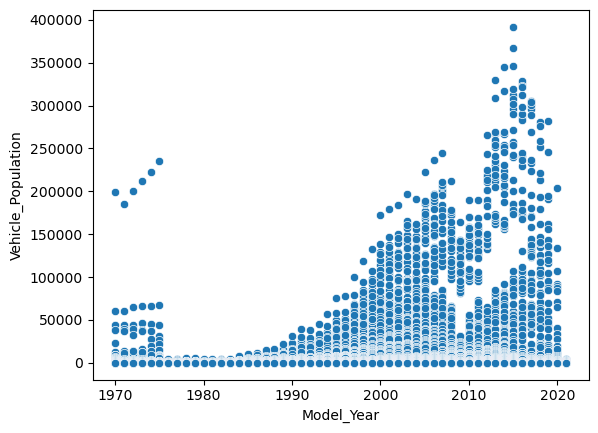

In [38]:

sns.scatterplot(x='Model_Year', y='Vehicle_Population', data=df)

### Feature Engineering

## <span style="color:red">Feature Selection</span>

In [39]:
continuous_variables = ['Date','Model_Year']
categorical_variables = ['Vehicle_Category','GVWR_Class', 'Fuel_Type', 'Fuel_Technology', 'Electric_Mile_Range', 'No.of_Vehicles_Reg_at_Same_Address', 'Region']
target = 'Vehicle_Population'

In [40]:
df.corr()

C:\Users\preej\AppData\Local\Temp\ipykernel_24620\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Model_Year,No.of_Vehicles_Reg_at_Same_Address,Vehicle_Population
Model_Year,1.000000,-0.001200,0.133432
No.of_Vehicles_Reg_at_Same_Address,-0.001200,1.000000,-0.003303
Vehicle_Population,0.133432,-0.003303,1.000000


### One Hot Encoding

In [41]:
# Convert all values in categorical columns to strings
df[categorical_variables] = df[categorical_variables].astype(str)

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical variables
df_encoded = one_hot_encoder.fit_transform(df[categorical_variables])

# Get the column names for the one-hot encoded variables
column_names = one_hot_encoder.get_feature_names_out(categorical_variables)

# Create a DataFrame with the one-hot encoded variables
df_encoded = pd.DataFrame(df_encoded, columns=column_names)

# Concatenate the one-hot encoded variables with the continuous variables and target
df_encoded = pd.concat([df_encoded, df[continuous_variables], df[target]], axis=1)

# Now, df_encoded contains your dataset with one-hot encoded categorical variables,
# continuous variables, and the target variable


C:\Users\preej\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
df[categorical_variables]

,Vehicle_Category,GVWR_Class,Fuel_Type,Fuel_Technology,Electric_Mile_Range,No.of_Vehicles_Reg_at_Same_Address,Region
0,P,Not Applicable,Gasoline,ICE,Not Applicable,2.0,Statewide
1,P,Not Applicable,Gasoline,ICE,Not Applicable,2.0,Statewide
2,P,Not Applicable,Gasoline,ICE,Not Applicable,2.0,Statewide
3,P,Not Applicable,Gasoline,ICE,Not Applicable,2.0,Statewide
4,P,Not Applicable,Gasoline,ICE,Not Applicable,2.0,Statewide
...,...,...,...,...,...,...,...
48594,B,Not Applicable,Diesel,ICE,Not Applicable,1.0,Statewide
48595,B,Not Applicable,Diesel,ICE,Not Applicable,2.0,Statewide
48596,B,Not Applicable,Diesel,ICE,Not Applicable,3.0,Statewide
48597,B,Not Applicable,Diesel,ICE,Not Applicable,2.0,Statewide


In [43]:
df_encoded.head()

,Vehicle_Category_BS,Vehicle_Category_BT,Vehicle_Category_MC,Vehicle_Category_MH,Vehicle_Category_P,Vehicle_Category_T1,Vehicle_Category_T2,Vehicle_Category_T3,Vehicle_Category_T4,Vehicle_Category_T5,...,Electric_Mile_Range_101 to 150 miles,Electric_Mile_Range_51 to 100 miles,Electric_Mile_Range_>150 miles,Electric_Mile_Range_Not Applicable,Electric_Mile_Range_Unknown,No.of_Vehicles_Reg_at_Same_Address_2.0,No.of_Vehicles_Reg_at_Same_Address_3.0,Date,Model_Year,Vehicle_Population
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2020-01-01,2015.0,312920.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2020-01-01,2016.0,312842.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2020-01-01,2017.0,303437.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2020-01-01,2019.0,281921.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2020-01-01,2018.0,281326.0


In [44]:
df_encoded.corr()['Vehicle_Population']

C:\Users\preej\AppData\Local\Temp\ipykernel_24620\3772143260.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_encoded.corr()['Vehicle_Population']


Vehicle_Category_BS                      -0.043323
Vehicle_Category_BT                      -0.040633
Vehicle_Category_MC                       0.036131
Vehicle_Category_MH                      -0.032883
Vehicle_Category_P                        0.074289
Vehicle_Category_T1                       0.074834
Vehicle_Category_T2                       0.060622
Vehicle_Category_T3                       0.048968
Vehicle_Category_T4                       0.006608
Vehicle_Category_T5                      -0.025652
Vehicle_Category_T6                      -0.089134
Vehicle_Category_T7                      -0.018032
GVWR_Class_2                              0.083928
GVWR_Class_3                             -0.025652
GVWR_Class_4                             -0.034063
GVWR_Class_5                             -0.033070
GVWR_Class_6                             -0.036030
GVWR_Class_7                             -0.038909
GVWR_Class_8                             -0.018032
GVWR_Class_Not Applicable      

## <span style="color:red">Modeling</span>

In [45]:
df_encoded.dropna(inplace=True)  # Drop rows with missing values
X = df_encoded.drop(columns=['Vehicle_Population', 'Date', 'Model_Year'])
y = df_encoded['Vehicle_Population']
X

,Vehicle_Category_BS,Vehicle_Category_BT,Vehicle_Category_MC,Vehicle_Category_MH,Vehicle_Category_P,Vehicle_Category_T1,Vehicle_Category_T2,Vehicle_Category_T3,Vehicle_Category_T4,Vehicle_Category_T5,...,Fuel_Technology_FCEV,Fuel_Technology_ICE,Fuel_Technology_PHEV,Electric_Mile_Range_101 to 150 miles,Electric_Mile_Range_51 to 100 miles,Electric_Mile_Range_>150 miles,Electric_Mile_Range_Not Applicable,Electric_Mile_Range_Unknown,No.of_Vehicles_Reg_at_Same_Address_2.0,No.of_Vehicles_Reg_at_Same_Address_3.0
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
47886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
47887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
47888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [61]:
vehicle_df = pd.read_excel(r'C:\Users\preej\IOD\Workspace\new\Vehicle_Population_Train_Test_use.xlsx')

In [63]:
vehicle_df

,Date,Vehicle Category,GVWR Class,Fuel Type,Model Year,Fuel Technology,Electric Mile Range,Number of Vehicles Registered at the Same Address,Region,Vehicle Population
0,2020,P,Not Applicable,Gasoline,2015,ICE,Not Applicable,≥4,Statewide,312920
1,2020,P,Not Applicable,Gasoline,2016,ICE,Not Applicable,≥4,Statewide,312842
2,2020,P,Not Applicable,Gasoline,2017,ICE,Not Applicable,≥4,Statewide,303437
3,2020,P,Not Applicable,Gasoline,2019,ICE,Not Applicable,≥4,Statewide,281921
4,2020,P,Not Applicable,Gasoline,2018,ICE,Not Applicable,≥4,Statewide,281326
...,...,...,...,...,...,...,...,...,...,...
48594,2015,B,Not Applicable,Diesel,1978,ICE,Not Applicable,1,Statewide,1
48595,2015,B,Not Applicable,Diesel,1975,ICE,Not Applicable,2,Statewide,1
48596,2015,B,Not Applicable,Diesel,1973,ICE,Not Applicable,3,Statewide,1
48597,2015,B,Not Applicable,Diesel,1971,ICE,Not Applicable,2,Statewide,1


In [71]:
# df_encoded.dropna(inplace=True)  # Drop rows with missing values
X = vehicle_df['Model Year']
y = vehicle_df['Vehicle Population']


In [72]:
# Replace 'Unknown' with 0 in X (Model_Year)
X = vehicle_df['Model Year'].replace('Unknown', 0).astype(int)

# Replace 'Unknown' with 0 in y (Vehicle_Population)
y = vehicle_df['Vehicle Population'].replace('Unknown', 0).astype(float)


In [60]:
X.shape

(48599,)

In [73]:
X.values.reshape(-1,1)


array([[2015],
       [2016],
       [2017],
       ...,
       [1973],
       [1971],
       [1971]])

In [75]:
import numpy as np

# Reshape X to a 2D array with a single feature
X = np.array(X).reshape(-1, 1)


In [76]:
linear= LinearRegression()
linear.fit(X,y)
print('Linear coef:',linear.coef_,'Linear Intercept:',linear.intercept_)

Linear coef: [2.20513397] Linear Intercept: -861.921536809793


In [77]:
linear.score(X,y)

0.0007962706926630814

In [ ]:
X.iloc[:, 22]


In [ ]:
# Extract the feature for plotting
x_feature = X['Fuel_Type_Gasoline'].values.reshape(-1, 1)

# Create and fit the linear regression model
linear = LinearRegression()
linear.fit(x_feature, y)

# Make predictions using the model
y_pred = linear.predict(x_feature)

# Create a scatter plot
plt.scatter(x_feature, y, color='blue', label='Actual Data')
plt.plot(x_feature, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Fuel_Type_Gasoline')  
plt.ylabel('Veh.pop')
plt.legend()
plt.show()


In [ ]:

# Group the data by 'Fuel_Type_Gasoline' and calculate the mean of 'Veh.pop' for each group
grouped_data = df_encoded.groupby('Fuel_Type_Gasoline')['Vehicle_Population'].mean()

# Create a bar chart
plt.bar(grouped_data.index, grouped_data.values, color='blue')
plt.xlabel('Fuel_Type_Gasoline')
plt.ylabel('Mean Veh.pop')
plt.title('Mean Veh.pop by Fuel_Type_Gasoline')
plt.show()


### Train / test split



In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)

### Cross Validation

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:

# Split your data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)


In [ ]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of splits as needed
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train_idx, test_idx) in enumerate(k_fold.split(X, y)):
    
    # Get training and test sets for X and y
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Fit model with the training set
    linear.fit(X_train, Y_train)
    
    # Make predictions with training and test sets
    train_pred = linear.predict(X_train)
    test_pred = linear.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(r2_score(Y_train, train_pred))
    test_scores.append(r2_score(Y_test, test_pred))
    
    train_rmse.append(mean_squared_error(Y_train, train_pred, squared=False))
    test_rmse.append(mean_squared_error(Y_test, test_pred, squared=False))
    
# Create a metrics_df DataFrame to display R2 and RMSE scores
metrics_df = pd.DataFrame({'Training R2': train_scores,
                            'Test R2': test_scores,
                            'Training RMSE': train_rmse,
                            'Test RMSE': test_rmse
                            }, index=[i+1 for i in range(5)])

print(metrics_df)


In [ ]:
# Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [ ]:
## Use Forward Feature Selection to pick a good model
# start with no predictors
included = []
 
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}

# get the number of cases in the training data
n = X_train.shape[0]
while True:
    changed = False
    if show_steps:
        print('')
    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))
    # for each remaining feature to be evaluated
    for new_column in excluded:
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))
        # fit the model with the Training data
        fit = linear.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' %
                  (adjusted_r2, best['a_r2']))
        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' %
                      (best['feature'], best['r2'], best['a_r2']))
                
    # END for
    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' %
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break
print('')
print('Resulting features:')
print(', '.join(included))
print('R2',r2)
print('Adjusted R2',adjusted_r2)




In [ ]:
r2_values

In [ ]:
adjusted_r2_values

In [ ]:
best['r2']

In [ ]:
best['a_r2']

In [ ]:
# Initialize lists with R^2 and Adjusted R^2 values
r2_values = [0.0009617923600775402, 0.0009617923600775402]
adjusted_r2_values = [0.0006176797878949536, 0.0006176797878949536]

# Create a range for the number of features (assuming you have two data points)
num_features = range(1, len(r2_values) + 1)

# Create a figure and axis for the plot
plt.figure(figsize=(10, 5))
plt.plot(num_features, r2_values, marker='o', label='$R^2$')
plt.plot(num_features, adjusted_r2_values, marker='o', label='$Adjusted \: R^2$')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.legend()
plt.title('R^2 and Adjusted R^2 vs. Number of Features')
plt.grid(True)
plt.show()


  ### Prediction is in 2021 Gasoline fuel type vehicles will be used more depending upon the mean.

  ### END